In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
from requests import get
from bs4 import BeautifulSoup

In [2]:
en='environment/'
BB='Burning_biomass.csv'
EAT='Emissions_Agriculture_Total.csv'
EI='Emissions_intensities.csv'
EESAD='Environment_Emissions_by_Sector_E_All_Data_(Normalized).csv'
FA='Fertilizers_archive.csv'
FN='Fertilizers_nutrient.csv'
FP='Fertilizers_product.csv'
LU='Land_use.csv'
LU2='Land_use_2.csv'
PU='Pesticides_use.csv'
TC='Temperature_change.csv'

# Burning biomass
Now I look into the first database I have and try to clean it

In [3]:
bb=pd.read_csv(en+BB)

In [4]:
bb.Value.unique()

array([  0.    ,  70.383 ,  21.4659, ...,  63.0089, 190.6148,  81.7041])

In [5]:
#Ci sono valori non nulli in bb.Value, vedi: 
nonzerobb=bb[bb.Value!=0].groupby('Area')
nonzerobb.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
126,GI,Burning - Biomass,2,Afghanistan,7246,Burned Area,6797,Other forest,2000,2000,ha,7.038300e+01,Fc,Calculated data
132,GI,Burning - Biomass,2,Afghanistan,7246,Burned Area,6797,Other forest,2006,2006,ha,2.146590e+01,Fc,Calculated data
135,GI,Burning - Biomass,2,Afghanistan,7246,Burned Area,6797,Other forest,2009,2009,ha,2.146590e+01,Fc,Calculated data
144,GI,Burning - Biomass,2,Afghanistan,7245,Biomass burned (dry matter),6797,Other forest,2000,2000,tonnes,3.547303e+03,Fc,Calculated data
150,GI,Burning - Biomass,2,Afghanistan,7245,Biomass burned (dry matter),6797,Other forest,2006,2006,tonnes,1.081880e+03,Fc,Calculated data
528,GI,Burning - Biomass,3,Albania,7246,Burned Area,6797,Other forest,2000,2000,ha,7.672602e+03,Fc,Calculated data
529,GI,Burning - Biomass,3,Albania,7246,Burned Area,6797,Other forest,2001,2001,ha,1.931928e+02,Fc,Calculated data
531,GI,Burning - Biomass,3,Albania,7246,Burned Area,6797,Other forest,2003,2003,ha,1.159157e+03,Fc,Calculated data
533,GI,Burning - Biomass,3,Albania,7246,Burned Area,6797,Other forest,2005,2005,ha,6.439760e+01,Fc,Calculated data
535,GI,Burning - Biomass,3,Albania,7246,Burned Area,6797,Other forest,2007,2007,ha,2.024231e+04,Fc,Calculated data


In [6]:
# Ora voglio vedere quali sono i paesi che sono sempre a 0
bb[bb.Area.isin(nonzerobb.Area.unique())].Area.unique()


array(['Cameroon', 'Ghana', 'India', 'Spain', 'United States of America'],
      dtype=object)

In [7]:
bb[bb.Area=='Italy']

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
42918,GI,Burning - Biomass,106,Italy,7246,Burned Area,6796,Humid tropical forest,2000,2000,ha,0.0000,Fc,Calculated data
42919,GI,Burning - Biomass,106,Italy,7246,Burned Area,6796,Humid tropical forest,2001,2001,ha,0.0000,Fc,Calculated data
42920,GI,Burning - Biomass,106,Italy,7246,Burned Area,6796,Humid tropical forest,2002,2002,ha,0.0000,Fc,Calculated data
42921,GI,Burning - Biomass,106,Italy,7246,Burned Area,6796,Humid tropical forest,2003,2003,ha,0.0000,Fc,Calculated data
42922,GI,Burning - Biomass,106,Italy,7246,Burned Area,6796,Humid tropical forest,2004,2004,ha,0.0000,Fc,Calculated data
42923,GI,Burning - Biomass,106,Italy,7246,Burned Area,6796,Humid tropical forest,2005,2005,ha,0.0000,Fc,Calculated data
42924,GI,Burning - Biomass,106,Italy,7246,Burned Area,6796,Humid tropical forest,2006,2006,ha,0.0000,Fc,Calculated data
42925,GI,Burning - Biomass,106,Italy,7246,Burned Area,6796,Humid tropical forest,2007,2007,ha,0.0000,Fc,Calculated data
42926,GI,Burning - Biomass,106,Italy,7246,Burned Area,6796,Humid tropical forest,2008,2008,ha,0.0000,Fc,Calculated data
42927,GI,Burning - Biomass,106,Italy,7246,Burned Area,6796,Humid tropical forest,2009,2009,ha,0.0000,Fc,Calculated data


In [8]:
Elements=bb.Element.unique()

There are different kinds of emissions that can be evaluated. We would like a total score

In [9]:
prova=bb.groupby(['Area', 'Year'])

In [10]:
bb.Domain.unique()

array(['Burning - Biomass'], dtype=object)

In [11]:
prova.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,GI,Burning - Biomass,2,Afghanistan,7246,Burned Area,6796,Humid tropical forest,2000,2000,ha,0.0,Fc,Calculated data
1,GI,Burning - Biomass,2,Afghanistan,7246,Burned Area,6796,Humid tropical forest,2001,2001,ha,0.0,Fc,Calculated data
2,GI,Burning - Biomass,2,Afghanistan,7246,Burned Area,6796,Humid tropical forest,2002,2002,ha,0.0,Fc,Calculated data
3,GI,Burning - Biomass,2,Afghanistan,7246,Burned Area,6796,Humid tropical forest,2003,2003,ha,0.0,Fc,Calculated data
4,GI,Burning - Biomass,2,Afghanistan,7246,Burned Area,6796,Humid tropical forest,2004,2004,ha,0.0,Fc,Calculated data
5,GI,Burning - Biomass,2,Afghanistan,7246,Burned Area,6796,Humid tropical forest,2005,2005,ha,0.0,Fc,Calculated data
6,GI,Burning - Biomass,2,Afghanistan,7246,Burned Area,6796,Humid tropical forest,2006,2006,ha,0.0,Fc,Calculated data
7,GI,Burning - Biomass,2,Afghanistan,7246,Burned Area,6796,Humid tropical forest,2007,2007,ha,0.0,Fc,Calculated data
8,GI,Burning - Biomass,2,Afghanistan,7246,Burned Area,6796,Humid tropical forest,2008,2008,ha,0.0,Fc,Calculated data
9,GI,Burning - Biomass,2,Afghanistan,7246,Burned Area,6796,Humid tropical forest,2009,2009,ha,0.0,Fc,Calculated data


In [12]:
for x in Elements:
    bb[x]=np.nan
    bb[x]=np.where(bb['Element']==x, bb['Value'], np.nan)

In [13]:
bb.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,...,Biomass burned (dry matter),Emissions (N2O) (Burning biomass),Emissions (CH4) (Burning biomass),Emissions (CO2eq) from N2O (Burning biomass),Emissions (CO2eq) from CH4 (Burning biomass),Emissions (CO2eq) (Burning biomass),Implied emission factor for N2O (Burning biomass),Implied emission factor for CH4 (Burning biomass),Emissions (CO2) (Burning biomass),Implied emission factor for CO2
0,GI,Burning - Biomass,2,Afghanistan,7246,Burned Area,6796,Humid tropical forest,2000,2000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GI,Burning - Biomass,2,Afghanistan,7246,Burned Area,6796,Humid tropical forest,2001,2001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GI,Burning - Biomass,2,Afghanistan,7246,Burned Area,6796,Humid tropical forest,2002,2002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GI,Burning - Biomass,2,Afghanistan,7246,Burned Area,6796,Humid tropical forest,2003,2003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GI,Burning - Biomass,2,Afghanistan,7246,Burned Area,6796,Humid tropical forest,2004,2004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
bb=bb.drop('Element', axis=1)
bb=bb.drop('Element Code', axis=1)

In [15]:
bb[['Element Code', 'Element']]

KeyError: "None of [Index(['Element Code', 'Element'], dtype='object')] are in the [columns]"

In [21]:
bb.iloc[1,:]==bb.iloc[2,:]

Domain Code                                           True
Domain                                                True
Area Code                                             True
Area                                                  True
Item Code                                             True
Item                                                  True
Year Code                                            False
Year                                                 False
Unit                                                  True
Value                                                 True
Flag                                                  True
Flag Description                                      True
Burned Area                                           True
Biomass burned (dry matter)                          False
Emissions (N2O) (Burning biomass)                    False
Emissions (CH4) (Burning biomass)                    False
Emissions (CO2eq) from N2O (Burning biomass)         Fal

In [22]:
(bb['Year Code']==bb['Year']).all

<bound method Series.all of 0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
         ... 
92726    True
92727    True
92728    True
92729    True
92730    True
92731    True
92732    True
92733    True
92734    True
92735    True
92736    True
92737    True
92738    True
92739    True
92740    True
92741    True
92742    True
92743    True
92744    True
92745    True
92746    True
92747    True
92748    True
92749    True
92750    True
92751    True
92752    True
92753    True
92754    True
92755    True
Length: 92756, dtype: bool>

In [23]:
bb=bb.drop('Year Code', axis=1)

In [24]:
bb=bb.drop('Flag', axis=1)
bb=bb.drop('Flag Description', axis=1)


In [25]:
bb.columns[1:9]

Index(['Domain', 'Area Code', 'Area', 'Item Code', 'Item', 'Year', 'Unit',
       'Value'],
      dtype='object')

In [26]:
bb.head()
bb=bb.drop('Unit', axis=1)
bb=bb.drop('Value', axis=1)


In [27]:
bb.columns

Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Item Code', 'Item',
       'Year', 'Burned Area', 'Biomass burned (dry matter)',
       'Emissions (N2O) (Burning biomass)',
       'Emissions (CH4) (Burning biomass)',
       'Emissions (CO2eq) from N2O (Burning biomass)',
       'Emissions (CO2eq) from CH4 (Burning biomass)',
       'Emissions (CO2eq) (Burning biomass)',
       'Implied emission factor for N2O (Burning biomass)',
       'Implied emission factor for CH4 (Burning biomass)',
       'Emissions (CO2) (Burning biomass)', 'Implied emission factor for CO2'],
      dtype='object')

In [28]:
bb=bb.groupby(['Domain Code', 'Domain', 'Area Code', 'Area', 'Item Code', 'Item',
       'Year'])[['Emissions (N2O) (Burning biomass)',
       'Emissions (CH4) (Burning biomass)',
       'Emissions (CO2eq) from N2O (Burning biomass)',
       'Emissions (CO2eq) from CH4 (Burning biomass)',
       'Emissions (CO2eq) (Burning biomass)',
       'Implied emission factor for N2O (Burning biomass)',
       'Implied emission factor for CH4 (Burning biomass)',
       'Emissions (CO2) (Burning biomass)', 'Implied emission factor for CO2']].first().reset_index()

In [29]:
bb.Item.unique()

array(['Organic soils', 'Humid tropical forest', 'Other forest'],
      dtype=object)

# 'Emission_agriculture_total.csv'
Now I look into the Total emissions in agriculture database

In [30]:
eat=pd.read_csv(en+EAT)

In [31]:
eat.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,GT,Agriculture Total,2,Afghanistan,7225,Emissions (CH4),5058,Enteric Fermentation,2000,2000,gigagrams,272.140,A,"Aggregate, may include official, semi-official...",NaN
1,GT,Agriculture Total,2,Afghanistan,7231,Emissions (CO2eq),5058,Enteric Fermentation,2000,2000,gigagrams,5714.940,A,"Aggregate, may include official, semi-official...",NaN
2,GT,Agriculture Total,2,Afghanistan,7244,Emissions (CO2eq) from CH4,5058,Enteric Fermentation,2000,2000,gigagrams,5714.940,A,"Aggregate, may include official, semi-official...",NaN
3,GT,Agriculture Total,2,Afghanistan,7225,Emissions (CH4),5058,Enteric Fermentation,2001,2001,gigagrams,225.403,A,"Aggregate, may include official, semi-official...",NaN
4,GT,Agriculture Total,2,Afghanistan,7231,Emissions (CO2eq),5058,Enteric Fermentation,2001,2001,gigagrams,4733.463,A,"Aggregate, may include official, semi-official...",NaN


In [32]:
eat=eat.drop(['Element Code','Flag Description', 'Flag'], axis=1)

In [33]:
eat.head()

,Domain Code,Domain,Area Code,Area,Element,Item Code,Item,Year Code,Year,Unit,Value,Note
0,GT,Agriculture Total,2,Afghanistan,Emissions (CH4),5058,Enteric Fermentation,2000,2000,gigagrams,272.140,NaN
1,GT,Agriculture Total,2,Afghanistan,Emissions (CO2eq),5058,Enteric Fermentation,2000,2000,gigagrams,5714.940,NaN
2,GT,Agriculture Total,2,Afghanistan,Emissions (CO2eq) from CH4,5058,Enteric Fermentation,2000,2000,gigagrams,5714.940,NaN
3,GT,Agriculture Total,2,Afghanistan,Emissions (CH4),5058,Enteric Fermentation,2001,2001,gigagrams,225.403,NaN
4,GT,Agriculture Total,2,Afghanistan,Emissions (CO2eq),5058,Enteric Fermentation,2001,2001,gigagrams,4733.463,NaN


In [34]:
Elements=eat.Element.unique()

In [35]:
for x in Elements:
    eat[x]=np.nan
    eat[x]=np.where(eat['Element']==x, eat['Value'], np.nan)

In [36]:
eat=eat.drop('Element',axis=1)

In [37]:
eat.Note.unique()

array([nan])

In [38]:
eat=eat.drop('Note',axis=1)

In [39]:
eat.columns

Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Item Code', 'Item',
       'Year Code', 'Year', 'Unit', 'Value', 'Emissions (CH4)',
       'Emissions (CO2eq)', 'Emissions (CO2eq) from CH4',
       'Emissions (CO2eq) from N2O', 'Emissions (N2O)'],
      dtype='object')

In [40]:
eat=eat.groupby(['Domain Code', 'Domain', 'Area Code', 'Area', 'Item Code', 'Item',
       'Year', 'Unit'])[['Emissions (CH4)',
       'Emissions (CO2eq)', 'Emissions (CO2eq) from CH4',
       'Emissions (CO2eq) from N2O', 'Emissions (N2O)']].first().reset_index()

In [41]:
eat

,Domain Code,Domain,Area Code,Area,Item Code,Item,Year,Unit,Emissions (CH4),Emissions (CO2eq),Emissions (CO2eq) from CH4,Emissions (CO2eq) from N2O,Emissions (N2O)
0,GT,Agriculture Total,1,Armenia,5058,Enteric Fermentation,2000,gigagrams,21.7373,456.4827,456.4827,NaN,NaN
1,GT,Agriculture Total,1,Armenia,5058,Enteric Fermentation,2001,gigagrams,22.4631,471.7256,471.7256,NaN,NaN
2,GT,Agriculture Total,1,Armenia,5058,Enteric Fermentation,2002,gigagrams,23.3734,490.8408,490.8408,NaN,NaN
3,GT,Agriculture Total,1,Armenia,5058,Enteric Fermentation,2003,gigagrams,24.2637,509.5371,509.5371,NaN,NaN
4,GT,Agriculture Total,1,Armenia,5058,Enteric Fermentation,2004,gigagrams,25.4470,534.3874,534.3874,NaN,NaN
5,GT,Agriculture Total,1,Armenia,5058,Enteric Fermentation,2005,gigagrams,25.5360,536.2566,536.2566,NaN,NaN
6,GT,Agriculture Total,1,Armenia,5058,Enteric Fermentation,2006,gigagrams,26.2183,550.5838,550.5838,NaN,NaN
7,GT,Agriculture Total,1,Armenia,5058,Enteric Fermentation,2007,gigagrams,27.4738,576.9496,576.9496,NaN,NaN
8,GT,Agriculture Total,1,Armenia,5058,Enteric Fermentation,2008,gigagrams,27.7424,582.5907,582.5907,NaN,NaN
9,GT,Agriculture Total,1,Armenia,5058,Enteric Fermentation,2009,gigagrams,25.5387,536.3129,536.3129,NaN,NaN


We can at first evaluate the sum and than evaluate the cause

In [44]:
# Check if the units are the same
eat.Unit.unique()

array(['gigagrams'], dtype=object)

In [48]:
eat.columns

Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Item Code', 'Item',
       'Year', 'Unit', 'Emissions (CH4)', 'Emissions (CO2eq)',
       'Emissions (CO2eq) from CH4', 'Emissions (CO2eq) from N2O',
       'Emissions (N2O)'],
      dtype='object')

In [50]:
eat['Emissions (CO2eq) from CH4']/eat['Emissions (CH4)']

0        20.999972
1        21.000022
2        20.999974
3        20.999975
4        21.000016
5        21.000023
6        20.999981
7        20.999993
8        21.000011
9        21.000008
10       20.999996
11       20.999988
12       20.999985
13       21.000035
14       20.999990
15       21.000017
16       21.000010
17       20.999972
18       21.000545
19       21.000212
20       21.000100
21       20.999621
22       20.999814
23       21.000740
24       21.000693
25       21.000249
26       20.999304
27       21.000187
28       21.000938
29       21.000282
           ...    
33609    21.000199
33610    21.000041
33611    21.000015
33612    20.999868
33613    21.000118
33614    20.999700
33615    21.000000
33616    21.000105
33617    21.000072
33618    20.999865
33619    21.000254
33620    21.000091
33621          NaN
33622          NaN
33623          NaN
33624          NaN
33625          NaN
33626          NaN
33627          NaN
33628          NaN
33629          NaN
33630       

Since the 'Emissions (CO2eq)' column is the sum of the CO2eq productions of the N2O and of the CH4, we can consider to first evaluate only this column.

In [51]:
eat.Area.unique()

array(['Armenia', 'Afghanistan', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Australia', 'Austria', 'Bahamas', 'Bahrain', 'Barbados',
       'Bangladesh', 'Bermuda', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Botswana', 'Brazil', 'Aruba',
       'Belize', 'Solomon Islands', 'Brunei Darussalam', 'Bulgaria',
       'Myanmar', 'Burundi', 'Cameroon', 'Canada', 'Cabo Verde',
       'Cayman Islands', 'Central African Republic', 'Sri Lanka', 'Chad',
       'Chile', 'China, mainland', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Cuba', 'Cyprus', 'Azerbaijan',
       'Benin', 'Denmark', 'Dominica', 'Dominican Republic', 'Belarus',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Estonia',
       'Faroe Islands', 'Falkland Islands (Malvinas)', 'Fiji', 'Finland',
       'France', 'French Guiana', 'French Polynesia', 'Djibouti',
       'Georgia', 'Gabon', 'Gambia', 'Germany', 'Bos

In [53]:
#We replace anomalous names
changes = {'Area' : { 'Bosnia and Herzegovina' : 'Bosnia and Herz.' ,
                    'Brunei Darussalam' : 'Brunei',
                    "Czechoslovakia" : "Czechia",
                    "Republic of Korea" : 'South Korea',
                    "Democratic People's Republic of Korea" : 'North Korea',
                    "Democratic Republic of the Congo" : 'Dem. Rep. Congo',
                    "Bolivia (Plurinational State of)" : 'Bolivia',
                    "Venezuela (Bolivarian Republic of)" : 'Venezuela',
                    "Republic of Moldova" : 'Moldova',
                     "Dominican Republic" : 'Dominican Rep.',
                     "Equatorial Guinea" : "Eq. Guinea",
                     "Eswatini" : "eSwatini",
                     "Ethiopia PDR" : "Ethiopia",
                     "Iran (Islamic Republic of)":"Iran",
                     "Serbia and Montenegro" : "Serbia",
                     "Sudan (former)" : "Sudan",
                     "South Sudan" : "S. Sudan",
                     "Syrian Arab Republic":"Syria",
                     "The former Yugoslav Republic of Macedonia":"Macedonia",
                     "United Republic of Tanzania":"Tanzania",
                     "Viet Nam": "Vietnam",
                     'Russian Federation':"Russia"
                    }}
eat= eat.replace(changes)

In [57]:
eat[eat.Year==2017]

,Domain Code,Domain,Area Code,Area,Item Code,Item,Year,Unit,Emissions (CH4),Emissions (CO2eq),Emissions (CO2eq) from CH4,Emissions (CO2eq) from N2O,Emissions (N2O)
17,GT,Agriculture Total,1,Armenia,5058,Enteric Fermentation,2017,gigagrams,28.8317,605.4649,605.4649,NaN,NaN
35,GT,Agriculture Total,1,Armenia,5059,Manure Management,2017,gigagrams,1.2557,53.9072,26.3704,27.5367,0.0888
53,GT,Agriculture Total,1,Armenia,5061,Synthetic Fertilizers,2017,gigagrams,NaN,581.6040,NaN,581.6040,1.8761
71,GT,Agriculture Total,1,Armenia,5062,Manure applied to Soils,2017,gigagrams,NaN,31.5480,NaN,31.5480,0.1018
89,GT,Agriculture Total,1,Armenia,5063,Manure left on Pasture,2017,gigagrams,NaN,485.2866,NaN,485.2866,1.5654
107,GT,Agriculture Total,1,Armenia,5064,Crop Residues,2017,gigagrams,NaN,29.6496,NaN,29.6496,0.0956
125,GT,Agriculture Total,1,Armenia,5066,Burning - Crop residues,2017,gigagrams,0.0932,2.7065,1.9574,0.7491,0.0024
143,GT,Agriculture Total,1,Armenia,5067,Burning - Savanna,2017,gigagrams,0.0507,2.4713,1.0653,1.4060,0.0045
161,GT,Agriculture Total,2,Afghanistan,5058,Enteric Fermentation,2017,gigagrams,371.9253,7810.4313,7810.4313,NaN,NaN
179,GT,Agriculture Total,2,Afghanistan,5059,Manure Management,2017,gigagrams,23.7619,623.3735,499.0000,124.3735,0.4012


In [42]:
eat.Item.unique()

array(['Enteric Fermentation', 'Manure Management',
       'Synthetic Fertilizers', 'Manure applied to Soils',
       'Manure left on Pasture', 'Crop Residues',
       'Burning - Crop residues', 'Burning - Savanna', 'Rice Cultivation',
       'Cultivation of Organic Soils'], dtype=object)

In [59]:
eat['Domain Code'].unique()

array(['GT'], dtype=object)

In [61]:
eat.columns

Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Item Code', 'Item',
       'Year', 'Unit', 'Emissions (CH4)', 'Emissions (CO2eq)',
       'Emissions (CO2eq) from CH4', 'Emissions (CO2eq) from N2O',
       'Emissions (N2O)'],
      dtype='object')

In [62]:
# I drop these coloumns because they are not needed for the analysis
todrop=['Domain Code', 'Domain', 'Area Code', 'Item Code', 'Unit']

In [64]:
eat=eat.drop(todrop, axis=1)

In [70]:
eat2017=eat[eat.Year==2017]

In [71]:
eat2017=eat2017.drop('Year', axis=1)

In [81]:
prova=eat2017.drop('Item', axis=1)

In [98]:
results=eat.groupby(['Year', 'Area']).sum().reset_index()

,Year,Area,Emissions (CH4),Emissions (CO2eq),Emissions (CO2eq) from CH4,Emissions (CO2eq) from N2O,Emissions (N2O)
0,2000,Afghanistan,308.4857,9883.8944,6478.1976,3405.6968,10.9860
1,2000,Albania,107.3007,3380.2495,2253.3144,1126.9352,3.6351
2,2000,Algeria,190.2533,7755.8598,3995.3207,3760.5391,12.1308
3,2000,American Samoa,0.1671,4.5599,3.5091,1.0508,0.0034
4,2000,Andorra,0.0000,0.0000,0.0000,0.0000,0.0000
5,2000,Angola,575.7373,26610.1080,12090.4834,14519.6245,46.8373
6,2000,Anguilla,0.0000,0.0000,0.0000,0.0000,0.0000
7,2000,Antigua and Barbuda,1.1845,38.0960,24.8747,13.2213,0.0426
8,2000,Argentina,3179.6023,105644.9094,66771.6472,38873.2623,125.3976
9,2000,Armenia,22.8105,956.0300,479.0211,477.0087,1.5388


In [124]:
eat2017=results[results.Year==2017]
eat2017=eat2017[['Area', 'Emissions (CO2eq)']].sort_values(by='Emissions (CO2eq)', ascending=False)
top100=eat2017.iloc[0:100]

Text(0, 0.5, 'Gigagrams of CO2')

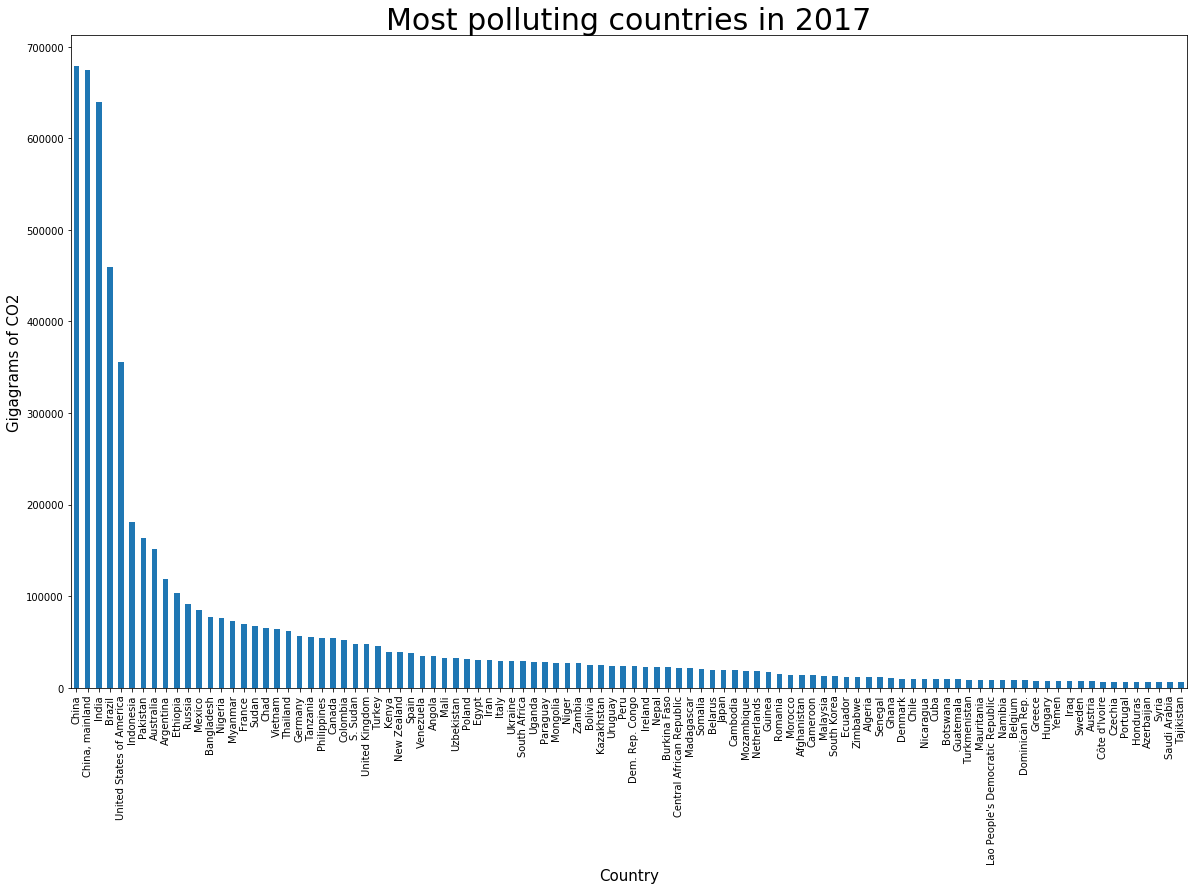

In [125]:
# Most polluting countries of 2017
plt.figure(figsize=(20,12))
plt.title('Most polluting countries in 2017', fontsize=30)
plot = top100['Emissions (CO2eq)'].plot.bar()
plot.set_xticklabels(top20.Area)
plot.set_xlabel('Country', fontsize=15)
plot.set_ylabel('Gigagrams of CO2', fontsize=15)

In [ ]:
## Studia cosa vogliono dire i valori in Item e quindi se indicano diversi settori dell'agricoltura o meno

# Fertilizers
Now we will evaluate the fertilizers datasets in order to eventually evaluate its correlation with the CO2 production.


In [126]:
fa=pd.read_csv(en+FA)
fn=pd.read_csv(en+FN)
fp=pd.read_csv(en+FP)

In [127]:
fa.head()

,Domain Code,Domain,Country Code,Country,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,RA,Fertilizers archive,2,Afghanistan,5510,Production,1402,Ammonia,2000,2000,tonnes,0,NR,Not reported
1,RA,Fertilizers archive,2,Afghanistan,5510,Production,1402,Ammonia,2001,2001,tonnes,0,NR,Not reported
2,RA,Fertilizers archive,2,Afghanistan,5510,Production,1402,Ammonia,2002,2002,tonnes,0,NR,Not reported
3,RA,Fertilizers archive,2,Afghanistan,5610,Import Quantity,1402,Ammonia,2000,2000,tonnes,0,NR,Not reported
4,RA,Fertilizers archive,2,Afghanistan,5610,Import Quantity,1402,Ammonia,2001,2001,tonnes,0,NR,Not reported


In [145]:
def uniquevalues(df):
    for i in ['Domain Code', 'Domain', 'Element Code', 'Element', 'Item Code', 'Item', 'Year Code', 'Year']:
        print(i)
        print(df[i].unique())
uniquevalues(fa)

Domain Code
['RA']
Domain
['Fertilizers archive']
Element Code
[5510 5610 5910 5157 5751]
Element
['Production' 'Import Quantity' 'Export Quantity' 'Consumption'
 'Prices Paid by Farmers']
Item Code
[1402 1362 1379 1368 1361 1363 1378 1372 1366 1365 1392 1377 1390 1382
 1389 1388 1360 1381 1370 1369 1380 1391 1375 1386 1387 1376 1364 1367
 1403]
Item
['Ammonia' 'Ammonium nitrate' 'Ammonium Phosphat (P2o5)'
 'Ammonium Phosphate (N)' 'Ammonium sulphate' 'Ammonium SulphateNitrate'
 'Basic Slag' 'Calcium ammonium nitrate' 'Calcium Cyanamide'
 'Calcium Nitrate' 'Complex Fertilizer (K2o)' 'Concent Superphosphate'
 'Crude Salts To 20% K2o' 'Ground Rock Phosphate' 'Muriate 20-45% K2o'
 'Muriate Over 45% K2o' 'Nitrogenous fertilizers'
 'Oth Complex Fert (P2o5)' 'Other Complex Fert (N)'
 'Other Nitrogenous Fert' 'Other Phosphate Fertil'
 'Other Potash Fertilizers' 'Phosphate fertilizers' 'Potash fertilizers'
 'Potassium sulphate' 'Single Superphosphate' 'Sodium Nitrate' 'Urea'
 'Phosphoric Acid'

In [130]:
fn.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,RFN,Fertilizers by Nutrient,2,Afghanistan,5510,Production,3102,Nutrient nitrogen N (total),2002,2002,tonnes,23414.0,Qm,Official data from questionnaires and/or natio...
1,RFN,Fertilizers by Nutrient,2,Afghanistan,5510,Production,3102,Nutrient nitrogen N (total),2003,2003,tonnes,16206.0,Qm,Official data from questionnaires and/or natio...
2,RFN,Fertilizers by Nutrient,2,Afghanistan,5510,Production,3102,Nutrient nitrogen N (total),2004,2004,tonnes,19458.0,Qm,Official data from questionnaires and/or natio...
3,RFN,Fertilizers by Nutrient,2,Afghanistan,5510,Production,3102,Nutrient nitrogen N (total),2005,2005,tonnes,15631.0,Qm,Official data from questionnaires and/or natio...
4,RFN,Fertilizers by Nutrient,2,Afghanistan,5510,Production,3102,Nutrient nitrogen N (total),2006,2006,tonnes,17636.0,Qm,Official data from questionnaires and/or natio...


In [133]:
uniquevalues(fn)

Domain Code
['RFN']
Domain
['Fertilizers by Nutrient']
Element Code
[5510 5610 5910 5157]
Element
['Production' 'Import Quantity' 'Export Quantity' 'Agricultural Use']
Item Code
[3102 3103 3104]
Item
['Nutrient nitrogen N (total)' 'Nutrient phosphate P2O5 (total)'
 'Nutrient potash K2O (total)']
Year Code
[2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017]
Year
[2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017]


In [135]:
uniquevalues(fp)

Domain Code
['RFB']
Domain
['Fertilizers by Product']
Element Code
[5610 5622 5910 5922 5510 5157]
Element
['Import Quantity' 'Import Value' 'Export Quantity' 'Export Value'
 'Production' 'Agricultural Use']
Item Code
[4007 4003 4002 4004 4022 4030 4023 4021 4008 4024 4014 4018 4011 4027
 4016 4025 4017 4005 4012 4001 4006 4026 4013]
Item
['Ammonia, anhydrous' 'Ammonium nitrate (AN)' 'Ammonium sulphate'
 'Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate'
 'Diammonium phosphate (DAP)' 'Fertilizers n.e.c.'
 'Monoammonium phosphate (MAP)' 'NPK fertilizers'
 'Other nitrogenous fertilizers, n.e.c.' 'Other NP compounds'
 'Other phosphatic fertilizers, n.e.c.'
 'Other potassic fertilizers, n.e.c.' 'Phosphate rock' 'PK compounds'
 'Potassium chloride (muriate of potash) (MOP)' 'Potassium nitrate'
 'Potassium sulphate (sulphate of potash) (SOP)' 'Sodium nitrate'
 'Superphosphates above 35%' 'Urea'
 'Urea and ammonium nitrate solutions (UAN)' 'Other NK compounds'
 'Superp